# 1-я часть

In [94]:
from os import listdir
images_dir = './dataset_FVC2000_DB4_B/dataset/train_data'
file_names = listdir(images_dir)
sample_count = len(file_names)
print(sample_count)

800


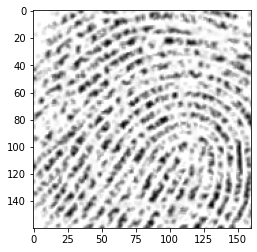

In [95]:
import cv2
import matplotlib.pyplot as plt
first_image = cv2.imread(images_dir + '/' + file_names[0],
cv2.IMREAD_GRAYSCALE)
plt.imshow(first_image, cmap='gray')
height, width = first_image.shape

In [96]:
from os.path import splitext
import pandas as pd
import numpy as np

depth = 1
X = np.zeros((sample_count, width, height, depth))
y = np.zeros((sample_count, 1), dtype=int)
for index, file_name in enumerate(file_names):
    full_path = images_dir + '/' + file_name
    file_label_text, file_number_and_ext = file_name.split('_')
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    label = int(file_label_text)
    X[index] = np.reshape(image, (width, height, depth))
    y[index] = label


In [97]:
unique_classes = 10

In [98]:
y_one_hot = np.zeros((sample_count, unique_classes))
for index, label in enumerate(y):
    y_one_hot[index, label] = 1

In [99]:
from tensorflow.keras import layers, losses, metrics, optimizers
from tensorflow.keras.models import Sequential

classifier = Sequential([
 layers.Conv2D(32, kernel_size=3, activation='relu',
input_shape=(height, width, depth)),
 layers.MaxPooling2D(pool_size=2),
 layers.Conv2D(64, kernel_size=3, activation='relu'),
 layers.MaxPooling2D(pool_size=2),
 layers.Conv2D(128, kernel_size=3, activation='relu'),
 layers.MaxPooling2D(pool_size=2),
 layers.Flatten(),
 layers.Dense(256),
 layers.Dense(unique_classes, activation='sigmoid')
])
classifier.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(), metrics=['accuracy'])
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 158, 158, 32)      320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 79, 79, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 18, 18, 128)    

In [100]:
X.shape

(800, 160, 160, 1)

In [103]:
y_one_hot.shape

(800, 10)

In [104]:
# y_train = np.asarray(y_one_hot).astype('float32').reshape((-1,1))
# print(y_train.shape)

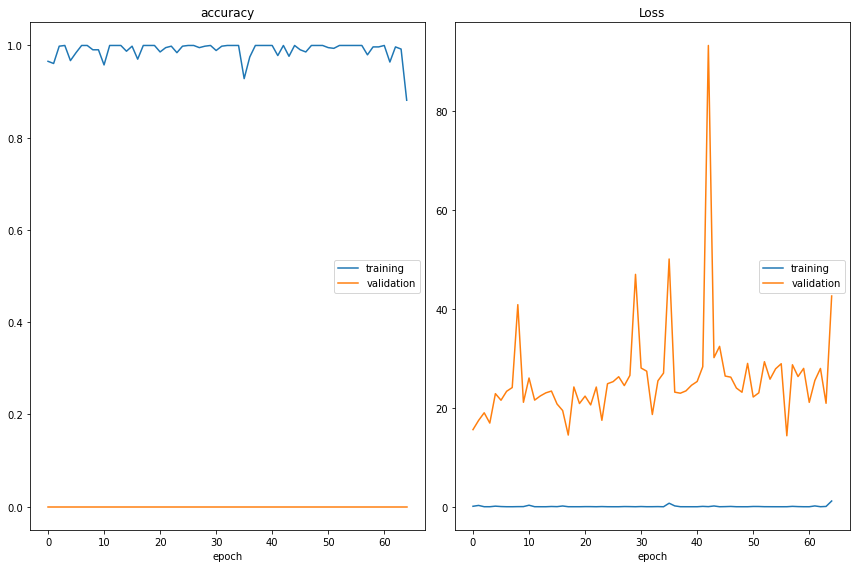

accuracy
	training         	 (min:    0.881, max:    1.000, cur:    0.881)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.000, max:    1.161, cur:    1.161)
	validation       	 (min:   14.361, max:   93.320, cur:   42.636)


In [116]:
# Обучаем модель,
# и выводим графики зависимостей точностей и функции стоимости или потерь(Loss) от номера итерации

from livelossplot import PlotLossesKeras
classifier.fit(X, y_one_hot, verbose=0, epochs=65,
validation_split=0.2, callbacks=[PlotLossesKeras()])

### Сформируем тестовую выборку

In [117]:
test_images_dir = './dataset_FVC2000_DB4_B/dataset/real_data'
test_file_names = listdir(test_images_dir)
test_sample_count = len(test_file_names)
print(test_sample_count)

10


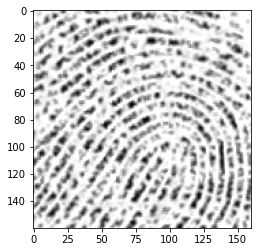

In [118]:
test_first_image = cv2.imread(test_images_dir + '/' + test_file_names[0],
cv2.IMREAD_GRAYSCALE)
plt.imshow(test_first_image, cmap='gray')
test_height, test_width = test_first_image.shape

In [119]:
depth = 1
X_test = np.zeros((test_sample_count, test_width, test_height, depth))
y_test = np.zeros((test_sample_count, 1), dtype=int)
for index, file_name in enumerate(test_file_names):
    full_path = test_images_dir + '/' + file_name
    file_label_text, ext = file_name.split('.')
    image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
    label = int(file_label_text)
    X_test[index] = np.reshape(image, (test_width, test_height, depth))
    y_test[index] = label

In [120]:
X_test.size

256000

In [121]:
y_test

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [122]:
result = classifier.predict(X_test)

In [123]:
print(result)

[[5.36050156e-31 4.91655469e-02 1.65660747e-12 5.85981011e-01
  0.00000000e+00 8.03400789e-14 1.09280097e-32 1.85622812e-13
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.93053615e-17 2.62430824e-22
  0.00000000e+00 6.56670836e-20 0.00000000e+00 6.85935447e-30
  0.00000000e+00 0.00000000e+00]
 [1.57262958e-19 8.92824471e-01 1.00000000e+00 8.75268789e-38
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.86937094e-01
  0.00000000e+00 0.00000000e+00]
 [7.04079866e-04 7.10071265e-27 1.43391515e-23 9.98668432e-01
  0.00000000e+00 1.76515415e-21 0.00000000e+00 1.16336663e-14
  0.00000000e+00 0.00000000e+00]
 [1.07262366e-09 1.51128990e-12 1.30753271e-24 1.95132886e-11
  1.97371514e-20 9.91529346e-01 1.05166353e-11 3.49792182e-18
  0.00000000e+00 0.00000000e+00]
 [1.95986627e-06 7.74517655e-03 5.50583967e-10 1.16402887e-07
  9.20939570e-19 2.58273882e-08 8.06145906e-09 9.97670174e-01
  1.00306101e-36 5.59539329e-36]
 [5.62531749e-12 1.65966617e-19 7.32975164e-26 4.67408707e

In [137]:
def index_of_max_element(arr):
    index = 0
    max_element = arr[0]
    for i in range(1, arr.size):
        # print(f'arr[{i}] = {arr[i]}')
        # print(f'arr[{i-1}] = {arr[i-1]}')
        if(arr[i] > max_element):
            max_element = arr[i]
            index = i
    return index

In [138]:
result_labels = []
for el in result:
    result_labels.append(index_of_max_element(el))


In [145]:
print(y_test)
print(result_labels)


[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[3, 1, 2, 3, 5, 7, 6, 7, 5, 7]


In [142]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)

print(accuracy_score(y_test, result_labels))
print(precision_score(y_test, result_labels,  average='macro', zero_division=1))
print(recall_score(y_test, result_labels, average='weighted'))
print(f1_score (y_test, result_labels,  average='weighted'))

0.5
0.7833333333333333
0.5
0.41666666666666663


# 2-я часть

In [146]:
import numpy as np
import cv2
from os import listdir

In [147]:
def load_data_from_folder(images_dir, height, width, depth):
    dir_names = listdir(images_dir)
    dir_count = len(dir_names)
    
    images_real = {}
    images_forgery = {}
    labels = set()
    
    for dir_name in dir_names:
        parts = dir_name.split('_')
        label_text = parts[0]
        is_forgery = len(parts) > 1
    
        if (label_text not in labels):
            labels.add(label_text)
            
        if label_text not in images_real:
            images_real[label_text] = []
            
        if label_text not in images_forgery:
            images_forgery[label_text] = []
            
        image_file_names = listdir(images_dir + '/' + dir_name)
        for image_file_name in image_file_names:
            image = cv2.imread(images_dir + '/' + dir_name + '/'+ image_file_name, cv2.IMREAD_GRAYSCALE)
            if is_forgery:
                images_forgery[label_text].append(image)
            else:
                images_real[label_text].append(image)
                
    X_base_list = []
    X_comparison_list = []
    y_list = []
    
    for label in labels:
        real_samples = images_real[label]
        forged_samples = images_forgery[label]
        for real_img in real_samples:
            real_resized = cv2.resize(real_img, (width, height))
            for another_real in real_samples:
                another_resized = cv2.resize(another_real, (width, height))
                X_base_list.append(real_resized.reshape((width, height, depth)))

                X_comparison_list.append(another_resized.reshape((width, height,depth)))
                y_list.append(1)
                
            for another_fake in forged_samples:
                fake_resized = cv2.resize(another_fake, (width, height))
                X_base_list.append(real_resized.reshape((width, height, depth)))

                X_comparison_list.append(fake_resized.reshape((width, height, depth)))
                y_list.append(0)
                
    X_base = np.array(X_base_list)
    X_comparison = np.array(X_comparison_list)
    y = np.array(y_list)

    return X_base, X_comparison, y

In [166]:
width = 160
height = 160
depth = 1
train_folder = './sign_data/train'

In [167]:
X_base, X_comparison, y = load_data_from_folder(train_folder, height, width, depth)

Label: 1


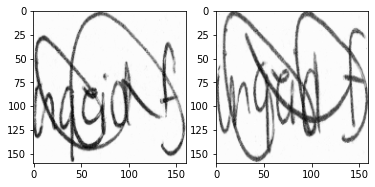

In [168]:
import matplotlib.pyplot as plt

index = 3
f, axes = plt.subplots(1,2)
axes[0].imshow(X_base[index, :, :, 0], cmap='gray')
axes[1].imshow(X_comparison[index, :, :, 0], cmap='gray')
print(f'Label: {y[index]}')

In [169]:
X_base.shape

(24093, 160, 160, 1)

In [170]:
X_comparison.shape

(24093, 160, 160, 1)

In [171]:
from tensorflow.keras import layers, losses, metrics, optimizers
from tensorflow.keras.models import Model

x1 = layers.Input(shape=(width, height, depth))
x2 = layers.Input(shape=(width, height, depth))

# параллельная модель
inputs = layers.Input(shape=(width, height, depth))
feature = layers.Conv2D(32, 3, activation='relu')(inputs)
feature = layers.MaxPooling2D(2)(feature)
feature = layers.Conv2D(64, 3, activation='relu')(feature)
feature = layers.MaxPooling2D(2)(feature)
feature = layers.Conv2D(128, 3, activation='relu')(feature)
feature = layers.MaxPooling2D(2)(feature)
feature_model = Model(inputs=inputs, outputs=feature)

x1_net = feature_model(x1)
x2_net = feature_model(x2)

net = layers.Subtract()([x1_net, x2_net])
net = layers.Conv2D(128, 3, activation='relu')(net)
net = layers.MaxPooling2D(2)(net)
net = layers.Flatten()(net)
net = layers.Dense(512, activation='relu')(net)
net = layers.Dense(1, activation='sigmoid')(net)

classifier = Model(inputs=[x1, x2], outputs=net)
classifier.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(), metrics=['accuracy'])
classifier.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 160, 160, 1  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 18, 18, 128)  92672       ['input_1[0][0]',                
                                                                  'input_2[0][0]']          

In [173]:
classifier.fit([X_base, X_comparison], y, epochs=10)

Epoch 1/10
753/753 [==============================] - 959s 1s/step - loss: 0.2201 - accuracy: 0.9367
Epoch 2/10
753/753 [==============================] - 952s 1s/step - loss: 0.0629 - accuracy: 0.9831
Epoch 3/10
753/753 [==============================] - 947s 1s/step - loss: 0.0398 - accuracy: 0.9942
Epoch 4/10
753/753 [==============================] - 995s 1s/step - loss: 0.0299 - accuracy: 0.9957
Epoch 5/10
753/753 [==============================] - 1026s 1s/step - loss: 0.0297 - accuracy: 0.9965
Epoch 6/10
753/753 [==============================] - 1021s 1s/step - loss: 0.0356 - accuracy: 0.9974
Epoch 7/10
753/753 [==============================] - 948s 1s/step - loss: 0.0232 - accuracy: 0.9983
Epoch 8/10
753/753 [==============================] - 1024s 1s/step - loss: 0.0227 - accuracy: 0.9982
Epoch 9/10
753/753 [==============================] - 1046s 1s/step - loss: 0.0180 - accuracy: 0.9983
Epoch 10/10
753/753 [==============================] - 944s 1s/step - loss: 0.0091 - ac

In [232]:
# Сохраняем модель в файл

save_path = './model.h5'
# classifier.save(save_path)

In [188]:
# Достаем модель из файла

import keras
model = keras.models.load_model(save_path)

In [224]:
width = 160
height = 160
depth = 1

test_image_real_path = './real.png'
test_image_real = cv2.imread(test_image_real_path, cv2.IMREAD_GRAYSCALE)
test_image_forg_path = './forg.png'
test_image_forg = cv2.imread(test_image_forg_path, cv2.IMREAD_GRAYSCALE)

Label: 1


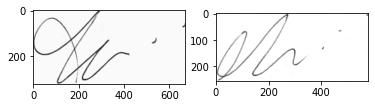

In [225]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1,2)
axes[0].imshow(test_image_real, cmap='gray')
axes[1].imshow(test_image_forg, cmap='gray')
print(f'Label: {y[index]}')

In [226]:
test_image_real_resized = cv2.resize(test_image_real, (width, height))
test_image_forg_resized = cv2.resize(test_image_forg, (width, height))

X_test_real = test_image_real_resized.reshape((width, height, depth))
X_test_forg = test_image_forg_resized.reshape((width, height, depth))

X_test_real = np.array([X_test_real])
X_test_forg = np.array([X_test_forg])

In [229]:
X_test_forg.shape

(1, 160, 160, 1)

In [230]:
result = model.predict([X_test_real, X_test_forg])

In [231]:
print(result)

[[3.5512965e-08]]
